In [1]:
import sys
sys.path.append('../pyorderedfuzzy')
sys.path.append('../pyimgamo')

In [2]:
import numpy as np
import imgamo
import problems
from problems import Kursawe
from players import ClonalSelection, SimulatedAnnealing, SimpleGeneticAlg
from operators import hiper_mutate
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
nvars = 3
nobjs = 2
bounds = ((-5.0, 5.0),) * nvars

In [4]:
problem = Kursawe(nvars=nvars, nobjs=nobjs, bounds=bounds, need_repair=False)

In [5]:
solutions = np.random.random(size=(100000, 3))

In [6]:
problem.evaluate_all(solutions)

array([[-17.29243181,   4.46823332],
       [-17.3738163 ,   4.51014002],
       [-17.1701264 ,   6.31799287],
       ...,
       [-16.24918207,   7.34119034],
       [-16.15310959,   6.93106593],
       [-15.40075299,  13.25526678]])

In [9]:
%%timeit
problem.evaluate_one(solutions, 0)

5.11 ms ± 69.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%%timeit
problem.evaluate_one_c(solutions, 0)

6.14 ms ± 65.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
from numba import cfunc, types, carray
import ctypes

In [12]:
c_sig = types.void(types.CPointer(types.double), types.CPointer(types.double), types.intc, types.intc, types.intc)

@cfunc(c_sig)
def _evaluate_one(in_, out, n, m, i):
    solutions = carray(in_, (n, m))
    out_array = carray(out, (n,))
    if i == 0:
        out_array[:] = np.sum(-10.0 * np.exp(-0.2 * np.sqrt(solutions[:, :-1] ** 2 + solutions[:, 1:] ** 2)), axis=1)[:]
    if i == 1:
        out_array[:] = np.sum(np.abs(solutions) ** 0.8 + 5.0 * np.sin(solutions ** 3), axis=1)[:]

In [13]:
_evaluate_one.compile()

In [14]:
%%timeit
n, m = solutions.shape
evaluated = np.zeros(n)
doublep = ctypes.POINTER(ctypes.c_double)
addr_in = solutions.ctypes.data
addr_out = evaluated.ctypes.data
ptr_in = ctypes.cast(addr_in, doublep)
ptr_out = ctypes.cast(addr_out, doublep)

_evaluate_one.ctypes(ptr_in, ptr_out, n, m, 0)

6.16 ms ± 80 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
players = [ClonalSelection(i, nclone=15, supp_level=0, mutate=hiper_mutate, mutate_args=(0.45, 0.9, 0.1))
           for i in range(nobjs)]

In [6]:
options = imgamo.Options(population_size=25, max_evaluations=-1, max_iterations=1000, exchange_iter=3, change_iter=3,
                         front_max=200, seed=None, verbose=100)

In [7]:
solver = imgamo.IMGAMO(problem, players, options)

In [8]:
solver.run_algorithm()

Iteration:  100
Evaluation count:  [21974. 21974.]
Front size:  161
Elapsed time: 0.2118760919999998

Iteration:  200
Evaluation count:  [43542. 43542.]
Front size:  200
Elapsed time: 0.8393413270000001

Iteration:  300
Evaluation count:  [65002. 65002.]
Front size:  200
Elapsed time: 1.538878461

Iteration:  400
Evaluation count:  [85716. 85716.]
Front size:  200
Elapsed time: 2.106009581

Iteration:  500
Evaluation count:  [107400. 107400.]
Front size:  200
Elapsed time: 2.6086798209999995

Iteration:  600
Evaluation count:  [128714. 128714.]
Front size:  200
Elapsed time: 3.26858225

Iteration:  700
Evaluation count:  [150026. 150026.]
Front size:  200
Elapsed time: 3.957156699

Iteration:  800
Evaluation count:  [171336. 171336.]
Front size:  200
Elapsed time: 4.572523774

Iteration:  900
Evaluation count:  [192358. 192358.]
Front size:  200
Elapsed time: 5.335465083999999

Iteration:  1000
Evaluation count:  [213966. 213966.]
Front size:  200
Elapsed time: 5.897443915

Iteration: 

In [9]:
solver.result.summary()

Iterations:  1000
Evaluation count:  [213966. 213966.]
Evaluation count per iteration:  [213.966 213.966]
Front size:  200
Time: 5.92177624
Time per iteration: 0.00592177624


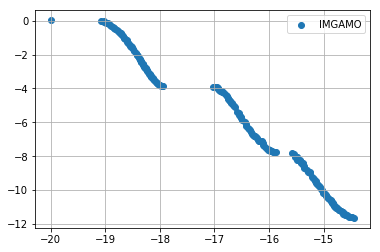

In [10]:
fig, ax = plt.subplots()
solver.result.plot_2d(ax, 0, 1)
plt.show()

In [22]:
np.power(0.1/1000, 1/20000)

0.9995395890030878

In [11]:
players = [SimulatedAnnealing(i, temp=1000, dec_step=0.99954, mutate=hiper_mutate, mutate_args=(0.45, 0.9, 0.1))
           for i in range(nobjs)]
options = imgamo.Options(population_size=25, max_evaluations=-1, max_iterations=30000, exchange_iter=3, change_iter=3,
                         front_max=200, seed=None, verbose=100)

In [12]:
solver = imgamo.IMGAMO(problem, players, options)

In [13]:
solver.run_algorithm()

Iteration:  100
Evaluation count:  [10900. 10900.]
Front size:  20
Elapsed time: 0.16503818199999998

Iteration:  200
Evaluation count:  [21700. 21700.]
Front size:  27
Elapsed time: 0.31444389900000047

Iteration:  300
Evaluation count:  [32600. 32600.]
Front size:  27
Elapsed time: 0.47355976000000055

Iteration:  400
Evaluation count:  [43400. 43400.]
Front size:  23
Elapsed time: 0.6245430069999998

Iteration:  500
Evaluation count:  [54200. 54200.]
Front size:  24
Elapsed time: 0.7754282260000007

Iteration:  600
Evaluation count:  [65100. 65100.]
Front size:  29
Elapsed time: 0.9237770250000015

Iteration:  700
Evaluation count:  [75900. 75900.]
Front size:  30
Elapsed time: 1.0749429490000004

Iteration:  800
Evaluation count:  [86700. 86700.]
Front size:  41
Elapsed time: 1.2229021640000006

Iteration:  900
Evaluation count:  [97600. 97600.]
Front size:  45
Elapsed time: 1.381652399

Iteration:  1000
Evaluation count:  [108400. 108400.]
Front size:  45
Elapsed time: 1.539389129

Iteration:  8200
Evaluation count:  [888400. 888400.]
Front size:  120
Elapsed time: 15.17719047

Iteration:  8300
Evaluation count:  [899200. 899200.]
Front size:  120
Elapsed time: 15.386005428

Iteration:  8400
Evaluation count:  [910100. 910100.]
Front size:  122
Elapsed time: 15.599179739

Iteration:  8500
Evaluation count:  [920900. 920900.]
Front size:  124
Elapsed time: 15.813560437

Iteration:  8600
Evaluation count:  [931700. 931700.]
Front size:  130
Elapsed time: 16.035659987000003

Iteration:  8700
Evaluation count:  [942600. 942600.]
Front size:  130
Elapsed time: 16.249151602

Iteration:  8800
Evaluation count:  [953400. 953400.]
Front size:  130
Elapsed time: 16.466028071

Iteration:  8900
Evaluation count:  [964200. 964200.]
Front size:  130
Elapsed time: 16.715098698000002

Iteration:  9000
Evaluation count:  [975100. 975100.]
Front size:  132
Elapsed time: 16.929327307

Iteration:  9100
Evaluation count:  [985900. 985900.]
Front size:  132
Elapsed time: 17.165442463


Iteration:  16200
Evaluation count:  [1755100. 1755100.]
Front size:  188
Elapsed time: 35.727923862

Iteration:  16300
Evaluation count:  [1765900. 1765900.]
Front size:  190
Elapsed time: 36.018024921

Iteration:  16400
Evaluation count:  [1776700. 1776700.]
Front size:  190
Elapsed time: 36.316026722000004

Iteration:  16500
Evaluation count:  [1787600. 1787600.]
Front size:  193
Elapsed time: 36.614325146

Iteration:  16600
Evaluation count:  [1798400. 1798400.]
Front size:  192
Elapsed time: 36.908134940000004

Iteration:  16700
Evaluation count:  [1809200. 1809200.]
Front size:  194
Elapsed time: 37.208098965

Iteration:  16800
Evaluation count:  [1820100. 1820100.]
Front size:  197
Elapsed time: 37.523854473

Iteration:  16900
Evaluation count:  [1830900. 1830900.]
Front size:  197
Elapsed time: 37.833977683

Iteration:  17000
Evaluation count:  [1841700. 1841700.]
Front size:  196
Elapsed time: 38.176198067

Iteration:  17100
Evaluation count:  [1852600. 1852600.]
Front size:  

Iteration:  24200
Evaluation count:  [2621700. 2621700.]
Front size:  200
Elapsed time: 61.325149736

Iteration:  24300
Evaluation count:  [2632600. 2632600.]
Front size:  200
Elapsed time: 61.637378418

Iteration:  24400
Evaluation count:  [2643400. 2643400.]
Front size:  200
Elapsed time: 61.958550476

Iteration:  24500
Evaluation count:  [2654200. 2654200.]
Front size:  200
Elapsed time: 62.277905918

Iteration:  24600
Evaluation count:  [2665100. 2665100.]
Front size:  200
Elapsed time: 62.604312418000006

Iteration:  24700
Evaluation count:  [2675900. 2675900.]
Front size:  200
Elapsed time: 62.928963251

Iteration:  24800
Evaluation count:  [2686700. 2686700.]
Front size:  200
Elapsed time: 63.278854451

Iteration:  24900
Evaluation count:  [2697600. 2697600.]
Front size:  200
Elapsed time: 63.601611164999994

Iteration:  25000
Evaluation count:  [2708400. 2708400.]
Front size:  200
Elapsed time: 63.917664626000004

Iteration:  25100
Evaluation count:  [2719200. 2719200.]
Front s

In [14]:
solver.result.summary()

Iterations:  30000
Evaluation count:  [3250000. 3250000.]
Evaluation count per iteration:  [108.33333333 108.33333333]
Front size:  200
Time: 80.021624937
Time per iteration: 0.0026673874979


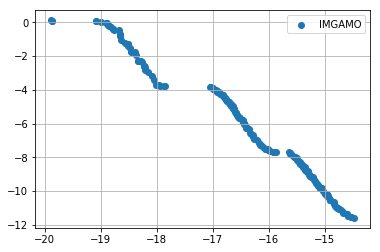

In [15]:
fig, ax = plt.subplots()
solver.result.plot_2d(ax, 0, 1)
plt.show()

In [24]:
players = [SimpleGeneticAlg(i, pc=0.7, pm=0.05, dx=0.001) for i in range(nobjs)]
options = imgamo.Options(population_size=25, max_evaluations=-1, max_iterations=3000, exchange_iter=3, change_iter=3,
                         front_max=200, seed=None, verbose=100)

In [25]:
solver = imgamo.IMGAMO(problem, players, options)

In [26]:
solver.run_algorithm()

Iteration:  100
Evaluation count:  [8400. 8400.]
Front size:  30
Elapsed time: 0.1709559269999943

Iteration:  200
Evaluation count:  [16700. 16700.]
Front size:  51
Elapsed time: 0.3294445479999979

Iteration:  300
Evaluation count:  [25100. 25100.]
Front size:  94
Elapsed time: 0.5191202970000006

Iteration:  400
Evaluation count:  [33400. 33400.]
Front size:  88
Elapsed time: 0.707008314999996

Iteration:  500
Evaluation count:  [41700. 41700.]
Front size:  88
Elapsed time: 0.8959374749999967

Iteration:  600
Evaluation count:  [50100. 50100.]
Front size:  126
Elapsed time: 1.0930354030000018

Iteration:  700
Evaluation count:  [58400. 58400.]
Front size:  134
Elapsed time: 1.320249001999997

Iteration:  800
Evaluation count:  [66700. 66700.]
Front size:  164
Elapsed time: 1.5746068539999953

Iteration:  900
Evaluation count:  [75100. 75100.]
Front size:  161
Elapsed time: 1.840129724999997

Iteration:  1000
Evaluation count:  [83400. 83400.]
Front size:  173
Elapsed time: 2.1269778

In [27]:
solver.result.summary()

Iterations:  3000
Evaluation count:  [250000. 250000.]
Evaluation count per iteration:  [83.33333333 83.33333333]
Front size:  200
Time: 8.757874450999992
Time per iteration: 0.002919291483666664


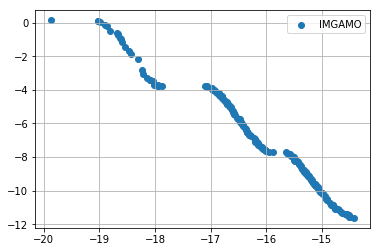

In [28]:
fig, ax = plt.subplots()
solver.result.plot_2d(ax, 0, 1)
plt.show()